<a href="https://colab.research.google.com/github/RahmaMostafaa/Airline_Delay_Cause_Deep_Learning/blob/main/Airline_Delay_Cause(Binary_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

In [ ]:
data = pd.read_csv('/content/Airline_Delay_Cause.csv')
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [ ]:
data.shape

(318017, 21)

In [ ]:
data.drop(['carrier_name','carrier','airport_name' ,'airport'],axis=1,inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,317268.0,2012.446159,5.677217,2003.00,2007.00,2012.00,2018.00,2022.00
month,317268.0,6.498339,3.460045,1.00,3.00,6.00,10.00,12.00
arr_flights,317268.0,382.061443,1027.517890,1.00,59.00,120.00,274.00,21977.00
arr_del15,317268.0,72.906952,198.941783,0.00,9.00,23.00,56.00,6377.00
carrier_ct,317268.0,21.089321,47.687189,0.00,3.01,8.21,19.71,1792.07
weather_ct,317268.0,2.618433,9.972375,0.00,0.00,0.58,2.00,717.94
nas_ct,317268.0,24.024307,85.146090,-0.01,1.69,5.50,15.37,4091.27
security_ct,317268.0,0.179184,0.845165,0.00,0.00,0.00,0.00,80.56
late_aircraft_ct,317268.0,24.995766,75.302884,0.00,1.65,5.87,17.05,1885.47
arr_cancelled,317268.0,7.206535,37.228725,0.00,0.00,1.00,4.00,4951.00


In [ ]:
data['Wd']=data['weather_delay'].apply(lambda x: 1 if x>100 else 0)
data['Wd']

,Wd
0,0
1,0
2,0
3,0
4,0
...,...
318012,1
318013,1
318014,0
318015,0


In [ ]:
data['Wd'].value_counts()

,count
Wd,
0,215116
1,102152


In [ ]:
x=data.drop(['Wd'],axis=1)
y=data['Wd']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42,shuffle=True)

print('x_train',x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape )

x_train (237951, 17)
(79317, 17)
(237951,)
(79317,)


In [ ]:
kerasModel= keras.models.Sequential([

    keras.layers.Dense(8,activation='tanh'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='sigmoid') # binary classification

])

In [ ]:
MyOptimizer = tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="AdamW")

In [ ]:
kerasModel.compile(
    optimizer=MyOptimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = kerasModel.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=200,
    batch_size=10000,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        patience=10,
        monitor='val_accuracy',
        restore_best_weights=True )]
  )

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7005 - loss: 0.5876 - val_accuracy: 0.7990 - val_loss: 0.4221
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8111 - loss: 0.4093 - val_accuracy: 0.8330 - val_loss: 0.3743
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8322 - loss: 0.3703 - val_accuracy: 0.8363 - val_loss: 0.3400
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8420 - loss: 0.3372 - val_accuracy: 0.8541 - val_loss: 0.3151
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8553 - loss: 0.3129 - val_accuracy: 0.8729 - val_loss: 0.2870
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8751 - loss: 0.2830 - val_accuracy: 0.8892 - val_loss: 0.2543
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8923 - loss: 0.2489 - val_accuracy: 0.9107 - val_loss: 0.2184
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9151 - loss: 0.2150 - val_accuracy: 0.

In [ ]:
kerasModel.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 8)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,853 (112.71 KB)

 Trainable params: 9,617 (37.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,236 (75.14 KB)

In [ ]:
kerasModel.evaluate(x_test,y_test)

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9983 - loss: 0.0069


[0.006619750056415796, 0.9984114170074463]

In [ ]:
kerasModel.save('kerasModel.keras')

In [ ]:
NewKerasModel = keras.models.load_model('kerasModel.keras')

In [ ]:
x_test

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
28698,2020,12,30.0,8.0,4.69,0.00,3.31,0.0,0.00,1.0,0.0,229.0,171.0,0.0,58.0,0.0,0.0
104493,2016,6,90.0,17.0,8.92,0.00,2.01,0.0,6.07,5.0,0.0,1160.0,695.0,0.0,88.0,0.0,377.0
192335,2010,7,534.0,95.0,31.07,1.95,5.58,0.0,56.39,0.0,0.0,4130.0,1133.0,76.0,191.0,0.0,2730.0
153052,2013,1,125.0,18.0,7.15,0.00,6.97,0.0,3.88,0.0,0.0,617.0,227.0,0.0,248.0,0.0,142.0
96802,2017,2,780.0,85.0,24.73,5.38,22.25,0.0,32.64,73.0,0.0,3589.0,1165.0,284.0,630.0,0.0,1510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197823,2010,3,359.0,64.0,28.35,14.57,15.25,1.0,4.83,14.0,0.0,3045.0,1406.0,931.0,501.0,15.0,192.0
142883,2013,9,97.0,10.0,2.98,0.00,6.27,0.0,0.75,0.0,0.0,388.0,114.0,0.0,241.0,0.0,33.0
232756,2008,4,154.0,21.0,13.58,0.00,3.03,0.0,4.39,1.0,0.0,939.0,668.0,0.0,82.0,0.0,189.0
194059,2010,6,7.0,3.0,0.00,0.00,0.01,0.0,2.99,1.0,0.0,395.0,0.0,0.0,2.0,0.0,393.0


In [ ]:
y_pred = kerasModel.predict(x_test)

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
print(y_pred.shape)

(79317, 1)


In [ ]:
print('Prediction items are {}'.format(y_pred[:5]))

Prediction items are [[7.9145124e-05]
 [3.0857799e-04]
 [7.0384488e-04]
 [7.9145124e-05]
 [9.9921244e-01]]


In [ ]:
print(y_test[:5])

28698     0
104493    0
192335    0
153052    0
96802     1
Name: Wd, dtype: int64


In [ ]:
model_loss ,model_accuracy = kerasModel.evaluate(x_test,y_test)
print('model_loss',model_loss)
print('model_accuracy',model_accuracy)

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9983 - loss: 0.0069
model_loss 0.006619750056415796
model_accuracy 0.9984114170074463


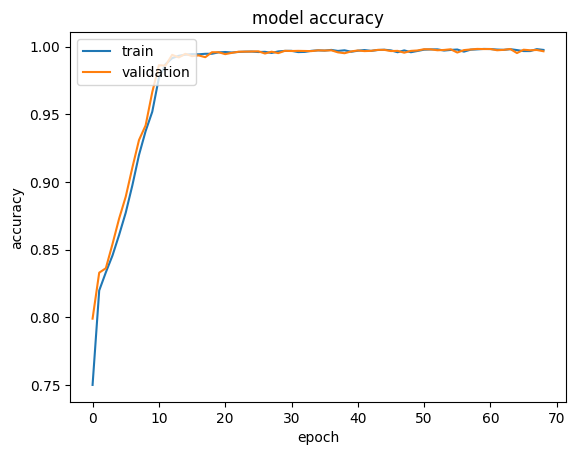

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


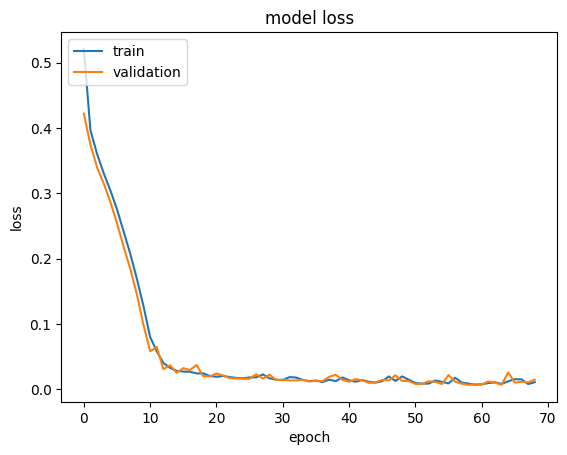

In [ ]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
len(y_test), len(y_pred)

(79317, 79317)

In [ ]:
y_pred_rounded = [np.round(i[0]) for i in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(y_test, y_pred_rounded)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[53504    45]
 [   81 25687]]


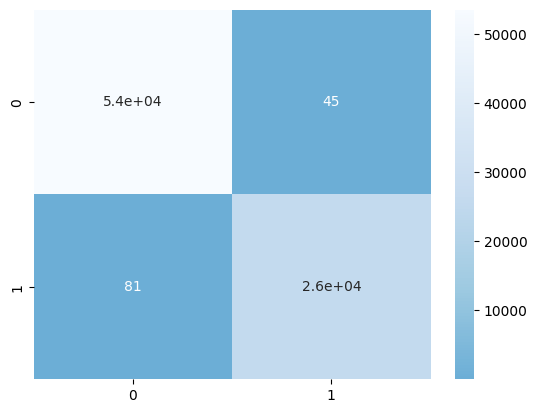

In [ ]:
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r',annot=True)
plt.show()


In [ ]:

from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred_rounded)
print('Classification Report is : \n', ClassificationReport )


Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53549
           1       1.00      1.00      1.00     25768

    accuracy                           1.00     79317
   macro avg       1.00      1.00      1.00     79317
weighted avg       1.00      1.00      1.00     79317

